In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv'

In [3]:
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = df.drop(columns =['Outcome'])
y = df.Outcome

In [5]:
X.shape, y.shape

((768, 8), (768,))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [8]:
from tensorflow.keras.models import Sequential # nn is going to be in sequence
from tensorflow.keras.layers import Dense # a neural layer

In [9]:
model = Sequential()
model.add(Dense(activation='relu', units=5, input_dim = X_train.shape[1]))
model.add(Dense(units=5, activation='relu')) # 2nd hidden layer
model.add(Dense(units=5, activation='relu')) # 3nd hidden layer
model.add(Dense(units=1, activation='sigmoid')) # output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 45        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 111 (444.00 Byte)
Trainable params: 111 (444.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
62/62 [==============================] - 1s 5ms/step - loss: 0.3070 - accuracy: 0.6273 - val_loss: 0.3062 - val_accuracy: 0.6423
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.6415 - val_loss: 0.2704 - val_accuracy: 0.6423
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.6415 - val_loss: 0.2479 - val_accuracy: 0.6423
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.6436 - val_loss: 0.2446 - val_accuracy: 0.6423
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.6456 - val_loss: 0.2426 - val_accuracy: 0.6423
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.6436 - val_loss: 0.2406 - val_accuracy: 0.6423
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.6415 - val_loss: 0.2389 - val_accuracy: 0.6423
Epoch 8/100
6

<Axes: >

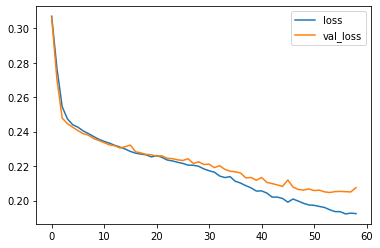

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')
history = model.fit(X_train,  
                    y_train, 
                    batch_size=8, 
                    epochs=100, 
                    validation_split=.2,
                    verbose=1,
                    callbacks=[early_stopping])
metrics_df = pd.DataFrame(history.history)
metrics_df[['loss', 'val_loss']].plot()

In [11]:
metrics_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

(0.0, 1.0)

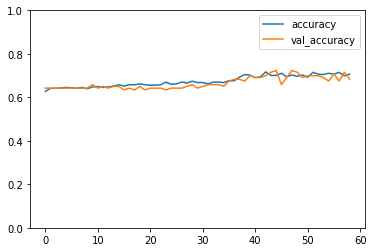

In [12]:
metrics_df[['accuracy', 'val_accuracy']].plot()
plt.ylim(0,1)

In [13]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [14]:
y_pred = y_pred > .5

In [15]:
confusion_matrix(y_test, y_pred)

array([[98,  7],
       [37, 12]], dtype=int64)

In [16]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       105
           1       0.63      0.24      0.35        49

    accuracy                           0.71       154
   macro avg       0.68      0.59      0.58       154
weighted avg       0.70      0.71      0.67       154



In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
Xo, yo = SMOTE().fit_resample(X,y)

In [20]:
from imblearn.under_sampling import RandomUnderSampler

In [21]:
Xu, yu = RandomUnderSampler().fit_resample(X,y)

- task
1. Model retrain with oversampled and undersampled data
2. Create a gradio UI for user prediction
  

In [22]:
tf.__version__

'2.14.0'